<a href="https://www.kaggle.com/code/mohammadamintaheri/titanic-passengers-survival-prediction?scriptVersionId=101336917" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Packages

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import random as rn
from sklearn.feature_selection import mutual_info_classif

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import ShuffleSplit, cross_validate, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from scipy.stats import uniform, loguniform

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Options

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', True)

sns.set_palette('Set1')
sns.set_style("white")

# Acquiring Data

In [3]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

# Analysis

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print('-' * 50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
print('Train Columns with Null Values:\n', train_df.isnull().sum())
print('-' * 50)
print('Test Columns with Null Values:\n', test_df.isnull().sum())
print('-' * 50)

percentiles = np.arange(0, 1, 0.05, dtype='float')
train_df.describe(percentiles=list(percentiles.round(2)), include='all')

Train Columns with Null Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Test Columns with Null Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
0%,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
5%,45.500000,0.000000,1.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN,7.225000,NaN,NaN
10%,90.000000,0.000000,1.000000,NaN,NaN,14.000000,0.000000,0.000000,NaN,7.550000,NaN,NaN


In [8]:
print('Training dataset has {} duplicated records'.format(train_df.duplicated().sum()))
print('Test dataset has {} duplicated records'.format(test_df.duplicated().sum()))      

Training dataset has 0 duplicated records
Test dataset has 0 duplicated records


In [9]:
# Correlation Checking
print(train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass', ascending=True))
print('-' * 50)
print(train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Sex', ascending=True))
print('-' * 50)
print(train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='SibSp', ascending=True))
print('-' * 50)
print(train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Parch', ascending=True))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


# Visualizations

In [10]:
def plot_num_dist(df, x=None, y=None):
    fig, axis = plt.subplots(1, 2, figsize=(16, 5))
    sns.histplot(data=df, x=x, y=y, kde=True, ax=axis[0])
    sns.boxplot(data=df, y=x, x=y, ax=axis[1])
    
def plot_cat_dist(df, var):
    fig, axis = plt.subplots(1, 2, figsize=(16, 5))
    df[var].value_counts().plot(kind="pie", explode=[0.05 for x in df[var].dropna().unique()], autopct='%1.1f%%', shadow=True, ax=axis[0])
    count = sns.countplot(data=df, x=var, ax=axis[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=11, xytext=(0, 8),
            textcoords='offset points')

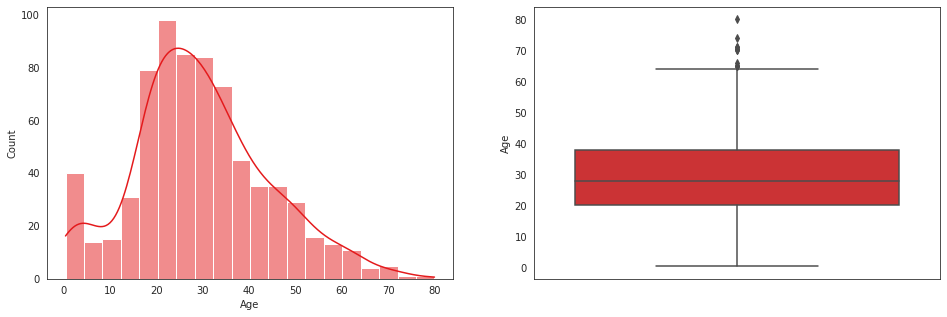

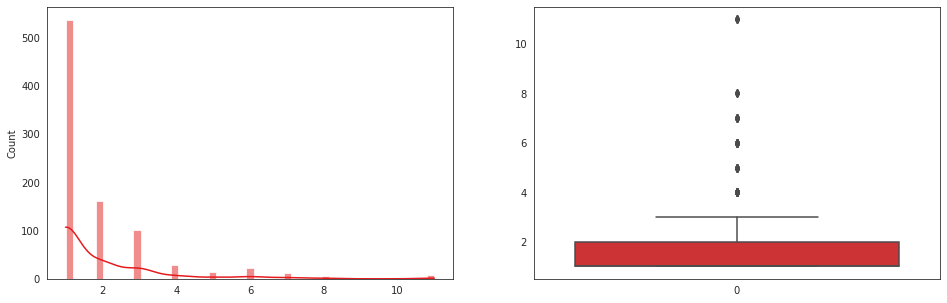

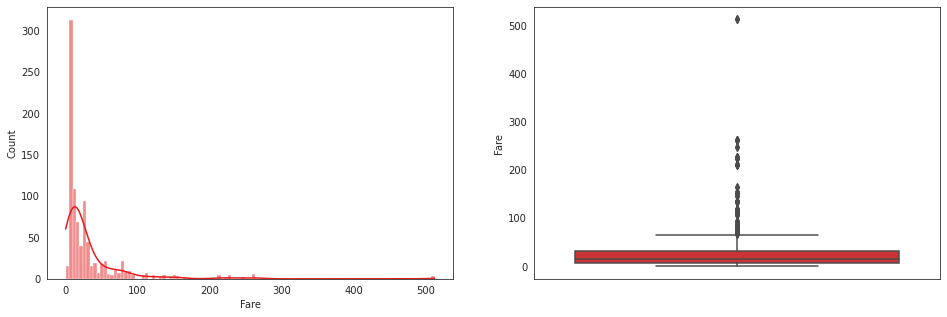

In [11]:
plot_num_dist(train_df, 'Age')
plot_num_dist(train_df['Parch'] + train_df['SibSp'] + 1)
plot_num_dist(train_df, 'Fare')

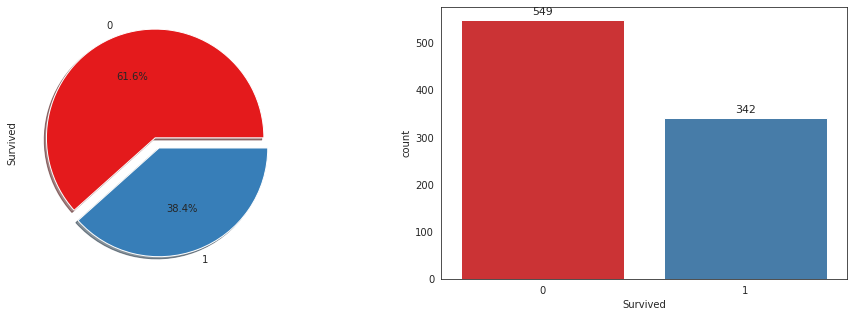

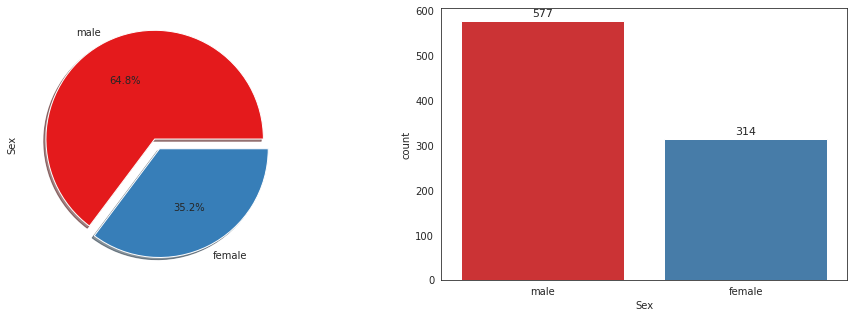

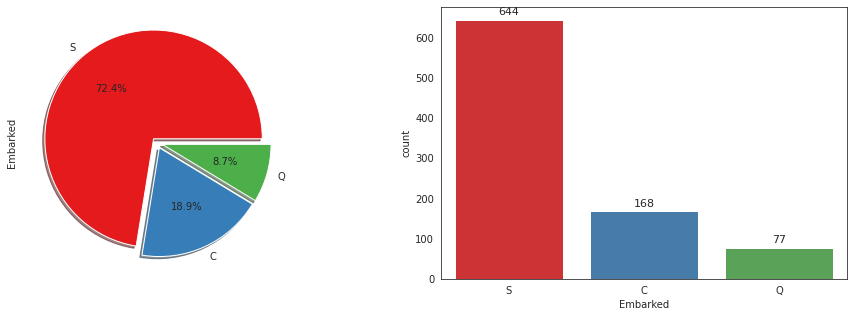

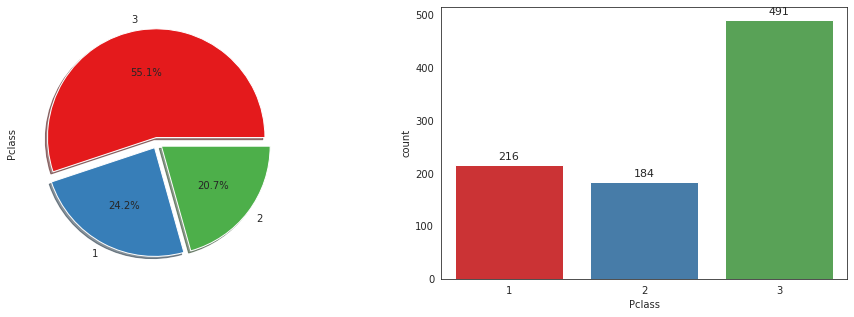

In [12]:
for cat_var in ["Survived", "Sex", "Embarked", "Pclass"]:
    plot_cat_dist(train_df, cat_var)

<AxesSubplot:ylabel='Fare'>

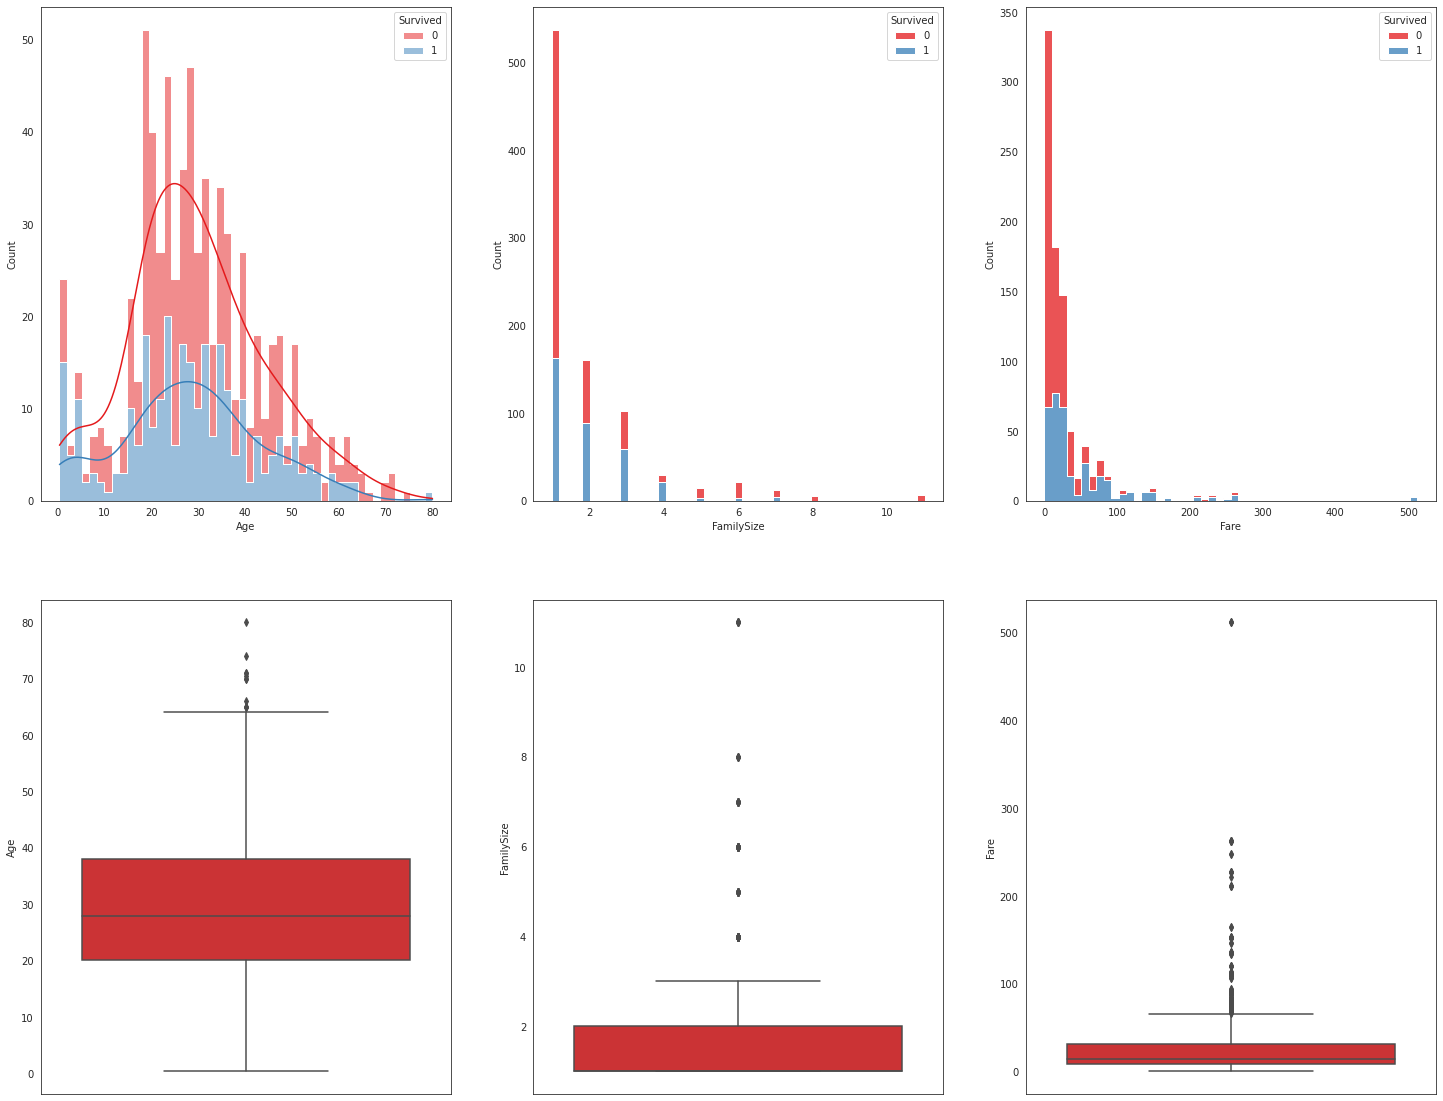

In [13]:
fig, axis = plt.subplots(2, 3, figsize=(25, 20))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=50, multiple='stack', element='step', kde=True, ax=axis[0, 0])
p = sns.histplot(data=train_df, x=(train_df['Parch'] + train_df['SibSp'] + 1), hue='Survived', multiple='stack', element='step', ax=axis[0, 1])
p.set_xlabel('FamilySize')
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=50, multiple='stack', element='step', ax=axis[0, 2])

sns.boxplot(data=train_df, y='Age', hue='Survived', ax=axis[1, 0])
p = sns.boxplot(data=train_df, y=(train_df['Parch'] + train_df['SibSp'] + 1), hue='Survived', ax=axis[1, 1])
p.set_ylabel('FamilySize')
sns.boxplot(data=train_df, y='Fare', hue='Survived', ax=axis[1, 2])

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

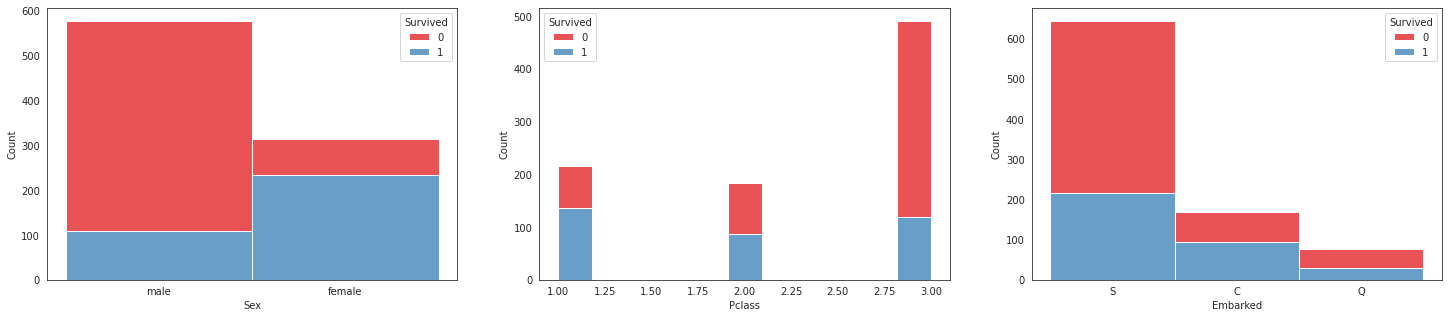

In [14]:
fig, axis = plt.subplots(1, 3, figsize=(25, 5))
sns.histplot(data=train_df, x='Sex', hue='Survived', multiple='stack', ax=axis[0])
sns.histplot(data=train_df, x='Pclass', hue='Survived', multiple='stack', ax=axis[1])
sns.histplot(data=train_df, x='Embarked', hue='Survived', multiple='stack', ax=axis[2])

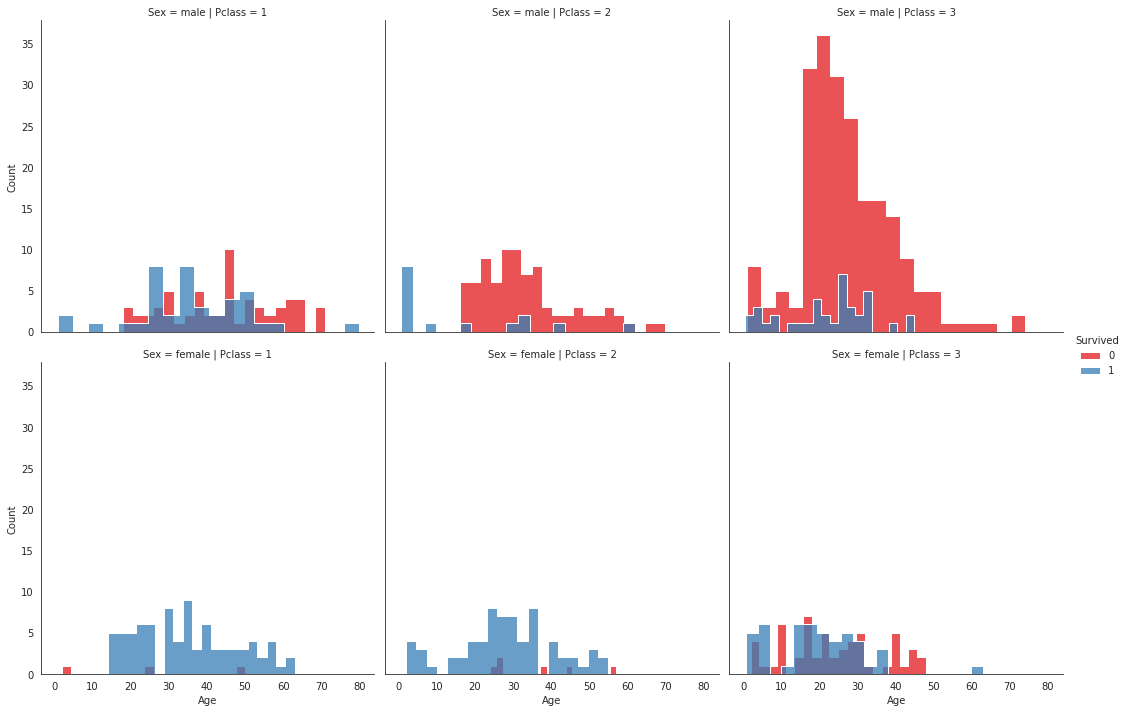

In [15]:
grid = sns.FacetGrid(train_df, row='Sex', col='Pclass', height=5, hue='Survived')
grid.map(sns.histplot, 'Age', bins=20, multiple='stack', element='step')
grid.add_legend()

Text(0, 0.5, 'FamilySize')

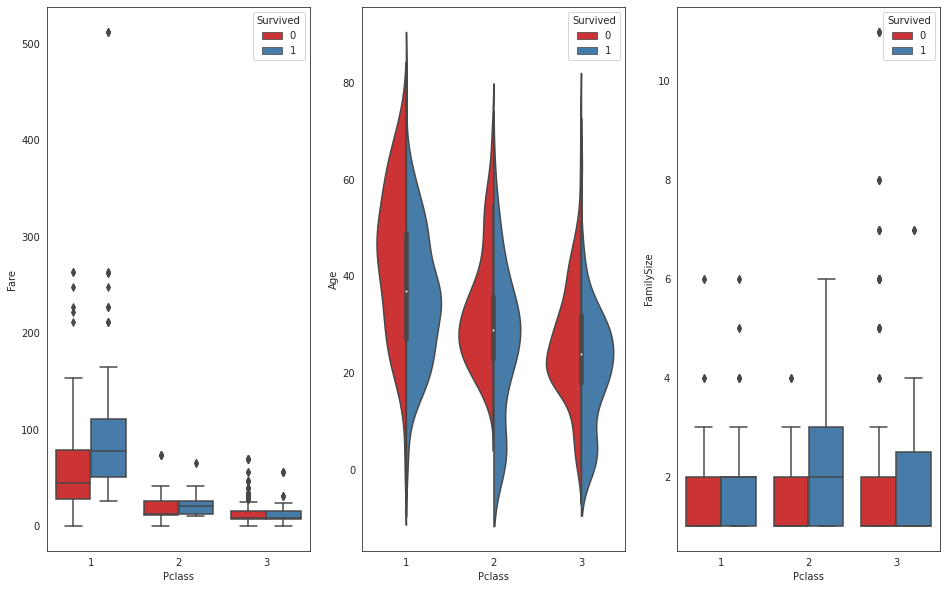

In [16]:
fig, axis = plt.subplots(1, 3, figsize=(16, 10))

sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Survived', ax=axis[0])
sns.violinplot(data=train_df, x='Pclass', y='Age', hue='Survived', split=True, ax=axis[1])
p = sns.boxplot(data=train_df, x='Pclass', y=(train_df['Parch'] + train_df['SibSp'] + 1), hue='Survived', ax=axis[2])
p.set_ylabel('FamilySize')

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

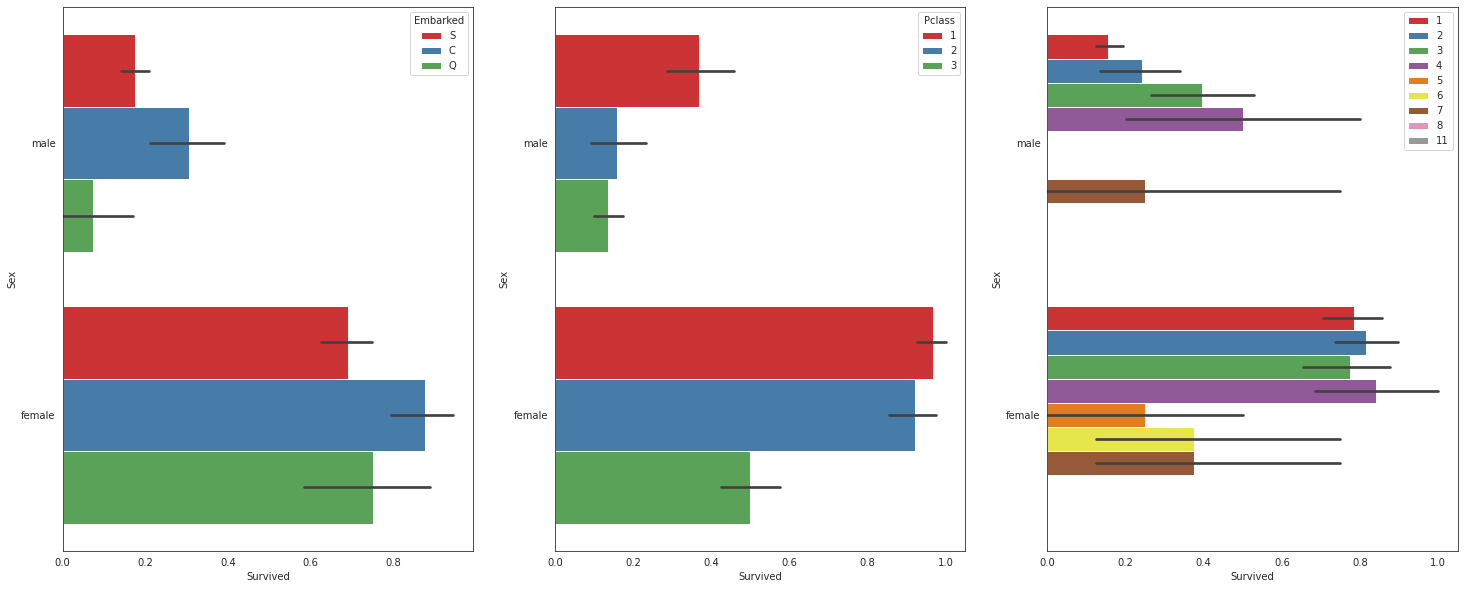

In [17]:
fig, axis = plt.subplots(1, 3, figsize=(25, 10))

sns.barplot(data=train_df, y='Sex', x='Survived', hue='Embarked', ax=axis[0])
sns.barplot(data=train_df, y='Sex', x='Survived', hue='Pclass', ax=axis[1])
sns.barplot(data=train_df, y='Sex', x='Survived', hue=(train_df['Parch'] + train_df['SibSp'] + 1), ax=axis[2])

<AxesSubplot:ylabel='Survived'>

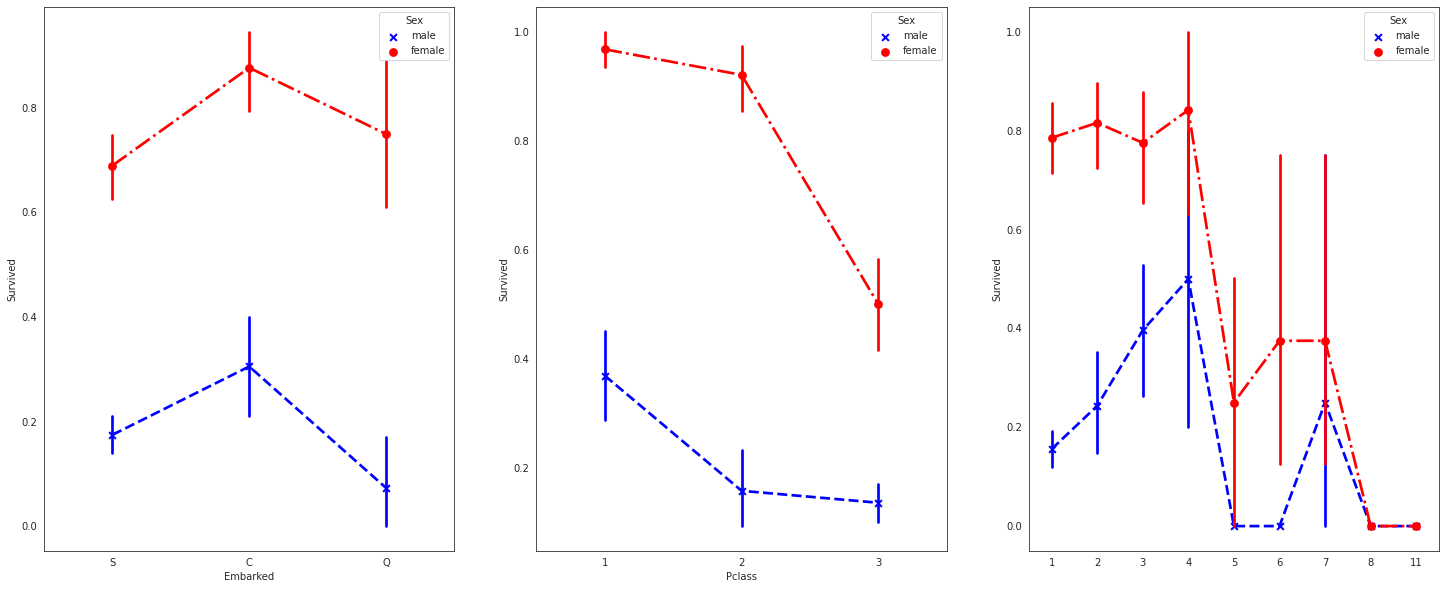

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(25, 10))

sns.pointplot(data=train_df, x='Embarked', y='Survived', hue='Sex', palette={'male': 'blue', 'female': 'red'}, markers=['x', 'o'],
              linestyles=['--', '-.'], ax=axis[0])
sns.pointplot(data=train_df, x='Pclass', y='Survived', hue='Sex', palette={'male': 'blue', 'female': 'red'}, markers=['x', 'o'],
              linestyles=['--', '-.'], ax=axis[1])
sns.pointplot(data=train_df, x=(train_df['Parch'] + train_df['SibSp'] + 1), y='Survived', hue='Sex', palette={'male': 'blue', 'female': 'red'}, markers=['x', 'o'],
              linestyles=['--', '-.'], ax=axis[2])

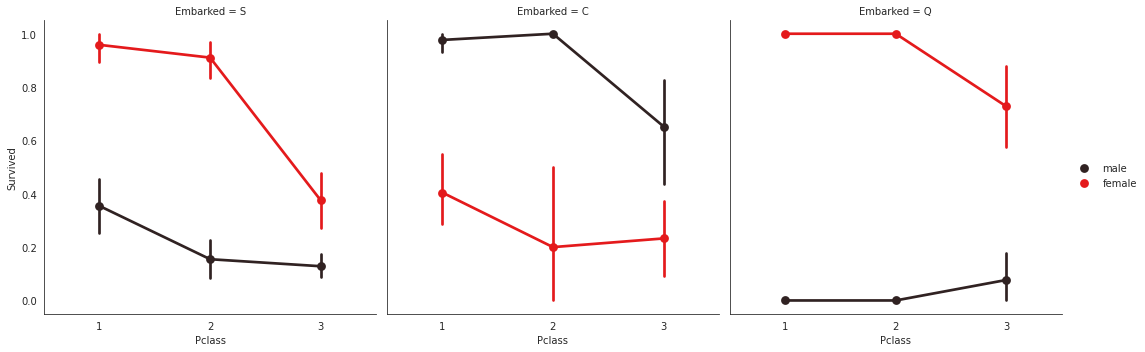

In [19]:
grid = sns.FacetGrid(data=train_df, col='Embarked', height=5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In [20]:
train_df.loc[train_df['Embarked'] == 'C'][['Survived', 'Sex', 'Pclass']].groupby(['Sex', 'Pclass']).mean()

# It seems that in the above figure, the middle plot has matched the Sex column to the hue parameter incorrectly

Survived
Sex    Pclass          
female 1       0.976744
       2       1.000000
       3       0.652174
male   1       0.404762
       2       0.200000
       3       0.232558

# Wrangling Data

In [21]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
train_df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Misc', inplace=True)
train_df['Title'].replace('Ms', 'Miss', inplace=True)
train_df['Title'].replace('Mlle', 'Miss', inplace=True)
train_df['Title'].replace('Mme', 'Mrs', inplace=True)

test_df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Misc', inplace=True)
test_df['Title'].replace('Master', 'Mr', inplace=True)
test_df['Title'].replace('Ms', 'Miss', inplace=True)
test_df['Title'].replace('Mlle', 'Miss', inplace=True)
test_df['Title'].replace('Mme', 'Mrs', inplace=True)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Misc,3,20
Miss,185,0
Mr,0,517
Mrs,126,0


In [23]:
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
0,Master,0.575000
1,Misc,0.347826
3,Mr,0.156673


In [24]:
null_num_cols = ['Age', 'Fare']
num_imputer = KNNImputer()

tmp_tr_df = pd.DataFrame(num_imputer.fit_transform(train_df[null_num_cols]))
tmp_tr_df.columns = null_num_cols
train_df[null_num_cols] = tmp_tr_df[null_num_cols]

tmp_te_df = pd.DataFrame(num_imputer.transform(test_df[null_num_cols]))
tmp_te_df.columns = null_num_cols
test_df[null_num_cols] = tmp_te_df[null_num_cols]


emb_imputer = SimpleImputer(strategy='most_frequent')

tmp_tr_df = pd.DataFrame(emb_imputer.fit_transform(train_df[['Embarked']]))
tmp_tr_df.columns = ['Embarked']
train_df[['Embarked']] = tmp_tr_df[['Embarked']]


print('Train Columns with Null Values:\n', train_df.isnull().sum())
print('-' * 50)
print('Test Columns with Null Values:\n', test_df.isnull().sum())

Train Columns with Null Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
--------------------------------------------------
Test Columns with Null Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [25]:
age_bands = pd.cut(train_df['Age'], 10)
result = age_bands.to_frame().join(train_df['Survived'], how='inner').groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(result)

                Age  Survived
0     (0.34, 8.378]  0.666667
9    (72.042, 80.0]  0.500000
6  (48.168, 56.126]  0.479167
1   (8.378, 16.336]  0.395833
4   (32.252, 40.21]  0.377358
7  (56.126, 64.084]  0.375000
2  (16.336, 24.294]  0.362245
5   (40.21, 48.168]  0.354430
3  (24.294, 32.252]  0.349265
8  (64.084, 72.042]  0.000000


In [26]:
fare_bands = pd.cut(train_df['Fare'], 4)
result = fare_bands.to_frame().join(train_df['Survived'], how='inner').groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(result)

                 Fare  Survived
3  (384.247, 512.329]  1.000000
1  (128.082, 256.165]  0.724138
2  (256.165, 384.247]  0.666667
0   (-0.512, 128.082]  0.368113


In [27]:
# Cannot use ordinal encoder to directly encode age_bands and fare_babnds; because transforming the test dataset, firstly needs this data to be cut into bins 
# which pattern should learned by the training dataset; not possible.

for df in [train_df, test_df]:
    df.loc[ df['Age'] <= 8, 'Age'] = 0
    df.loc[(df['Age'] > 8) & (df['Age'] <= 16), 'Age'] = 1
    df.loc[(df['Age'] > 16) & (df['Age'] <= 24), 'Age'] = 2
    df.loc[(df['Age'] > 24) & (df['Age'] <= 32), 'Age'] = 3
    df.loc[(df['Age'] > 32) & (df['Age'] <= 40), 'Age'] = 4
    df.loc[(df['Age'] > 40) & (df['Age'] <= 48), 'Age'] = 5
    df.loc[(df['Age'] > 48) & (df['Age'] <= 56), 'Age'] = 6
    df.loc[(df['Age'] > 56) & (df['Age'] <= 64), 'Age'] = 7
    df.loc[(df['Age'] > 64) & (df['Age'] <= 72), 'Age'] = 8
    df.loc[ df['Age'] > 72, 'Age'] = 9
    
    df.loc[ df['Fare'] <= 128, 'Fare'] = 0
    df.loc[(df['Fare'] > 128) & (df['Fare'] <= 256), 'Fare'] = 1
    df.loc[(df['Fare'] > 256) & (df['Fare'] <= 384), 'Fare'] = 2
    df.loc[ df['Fare'] > 384, 'Fare'] = 3

In [28]:
train_df['FamilyOnboard'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['FamilyOnboard'] = test_df['Parch'] + test_df['SibSp'] + 1

print(train_df[['FamilyOnboard', 'Survived']].groupby(['FamilyOnboard'], as_index=False).mean().sort_values(by='Survived', ascending=False))

train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilyOnboard'] > 1] = 0
test_df['IsAlone'] = 1
test_df['IsAlone'].loc[test_df['FamilyOnboard'] > 1] = 0

print(train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilyOnboard  Survived
3              4  0.724138
2              3  0.578431
1              2  0.552795
6              7  0.333333
0              1  0.303538
4              5  0.200000
5              6  0.136364
7              8  0.000000
8             11  0.000000
   IsAlone  Survived
0        0  0.505650
1        1  0.303538


# Dropping Unnecessary Columns

In [29]:
train_df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name', 'Parch', 'SibSp'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket', 'Name', 'Parch', 'SibSp'], axis=1, inplace=True)

print(' train_df shape: {} \n test_df shape: {}'.format(train_df.shape, test_df.shape))

 train_df shape: (891, 9) 
 test_df shape: (418, 9)


# Further Analysis

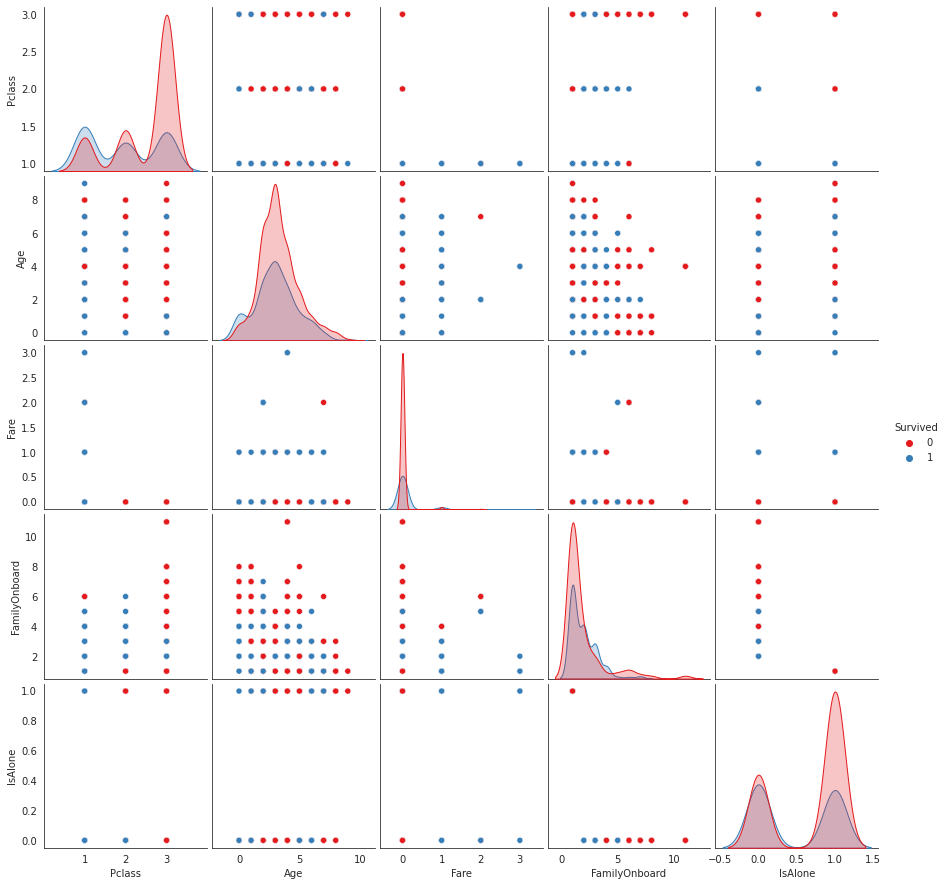

In [30]:
sns.pairplot(data=train_df, hue='Survived')

<AxesSubplot:>

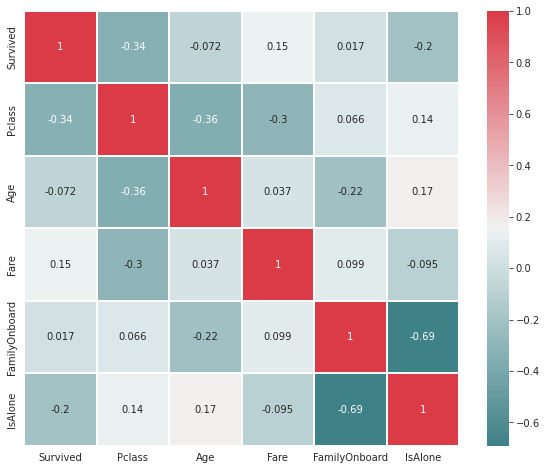

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), cmap=sns.diverging_palette(200, 10, as_cmap=True), square=True, annot=True, linewidths=0.1, linecolor='white')

# One-Hot Encoding Categorical Features

In [32]:
cat_cols = ['Title', 'Sex', 'Embarked']

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(train_df[cat_cols]))
oh_cols_test = pd.DataFrame(oh_encoder.transform(test_df[cat_cols]))

oh_cols_train.index = train_df.index
oh_cols_train.columns = oh_encoder.get_feature_names_out(cat_cols)
oh_cols_test.index = test_df.index
oh_cols_test.columns = oh_encoder.get_feature_names_out(cat_cols)

num_train = train_df.drop(cat_cols, axis=1)
num_test = test_df.drop(cat_cols, axis=1)

oh_train_df = pd.concat([num_train, oh_cols_train], axis=1)
oh_test_df = pd.concat([num_test, oh_cols_test], axis=1)

oh_train_df.sample(10)
# oh_test_df.sample(10)

,Survived,Pclass,Age,Fare,FamilyOnboard,IsAlone,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
150,0,2,6.0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,1,3,3.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
161,1,2,4.0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
13,0,3,4.0,0.0,7,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
143,0,3,2.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
11,1,1,7.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
805,0,3,3.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
701,1,1,4.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
168,0,1,5.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
399,1,2,3.0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='MI Scores'>

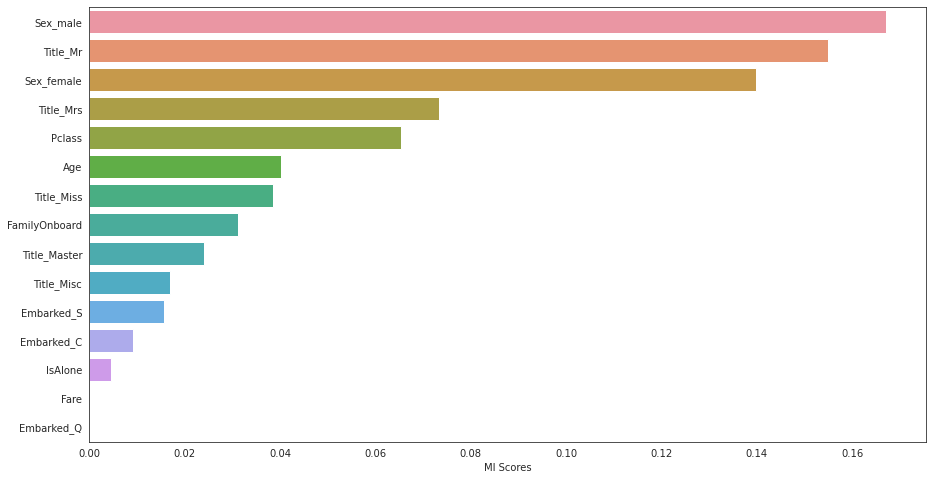

In [33]:
mi_scores = pd.Series(mutual_info_classif(X=oh_train_df.drop('Survived', axis=1), y=oh_train_df.loc[:,'Survived'], discrete_features='auto'),
                      name='MI Scores', index=oh_train_df.drop('Survived', axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=mi_scores, y=mi_scores.index)

# Evaluating Different Models

In [34]:
X = oh_train_df.drop('Survived', axis=1)
y = oh_train_df.loc[:,'Survived']

X_test = oh_test_df.drop('PassengerId', axis=1)

In [35]:
normalizer = StandardScaler()

X = pd.DataFrame(normalizer.fit_transform(X))
X_test = pd.DataFrame(normalizer.transform(X_test))

In [36]:
# This'll be used for correlation heatmap generation

predictions = pd.DataFrame(oh_train_df['Survived'])

In [37]:
Models = [LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier, SVC, NuSVC, LinearSVC, RandomForestClassifier,
          AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, GaussianProcessClassifier, KNeighborsClassifier,
          BernoulliNB, GaussianNB, DecisionTreeClassifier, ExtraTreeClassifier, XGBClassifier]

cv_split = ShuffleSplit(n_splits=10, train_size=0.8, random_state=0)

models_overview = pd.DataFrame(columns=['Model', 'Raw Accuracy', 'Raw Fit Time'])

row_index = 0
for Model in Models:
    try:
        model = Model(random_state=0)
    except TypeError:
        model = Model()
    
    cv_results = cross_validate(model, X, y, scoring='accuracy', cv=cv_split, n_jobs=-1)
    name = Model().__class__.__name__
    
    models_overview.loc[row_index, 'Model'] = name
    models_overview.loc[row_index, 'Raw Accuracy'] = cv_results['test_score'].mean()
    models_overview.loc[row_index, 'Raw Fit Time'] = cv_results['fit_time'].mean()
    
    row_index += 1
    
    model.fit(X, y)
    predictions[name] = model.predict(X)

In [38]:
models_overview.sort_values(by='Raw Accuracy', ascending=False)

,Model,Raw Accuracy,Raw Fit Time
5,SVC,0.836313,0.044399
0,LogisticRegression,0.83352,0.014905
7,LinearSVC,0.831285,0.06896
10,GradientBoostingClassifier,0.831285,0.129379
4,RidgeClassifier,0.831285,0.007811
13,GaussianProcessClassifier,0.831285,0.394118
14,KNeighborsClassifier,0.830726,0.006718
19,XGBClassifier,0.824022,0.427289
6,NuSVC,0.821788,0.034785
9,AdaBoostClassifier,0.82067,0.112298


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'SGDClassifier'),
  Text(2, 0, 'Perceptron'),
  Text(3, 0, 'PassiveAggressiveClassifier'),
  Text(4, 0, 'RidgeClassifier'),
  Text(5, 0, 'SVC'),
  Text(6, 0, 'NuSVC'),
  Text(7, 0, 'LinearSVC'),
  Text(8, 0, 'RandomForestClassifier'),
  Text(9, 0, 'AdaBoostClassifier'),
  Text(10, 0, 'GradientBoostingClassifier'),
  Text(11, 0, 'BaggingClassifier'),
  Text(12, 0, 'ExtraTreesClassifier'),
  Text(13, 0, 'GaussianProcessClassifier'),
  Text(14, 0, 'KNeighborsClassifier'),
  Text(15, 0, 'BernoulliNB'),
  Text(16, 0, 'GaussianNB'),
  Text(17, 0, 'DecisionTreeClassifier'),
  Text(18, 0, 'ExtraTreeClassifier'),
  Text(19, 0, 'XGBClassifier')])

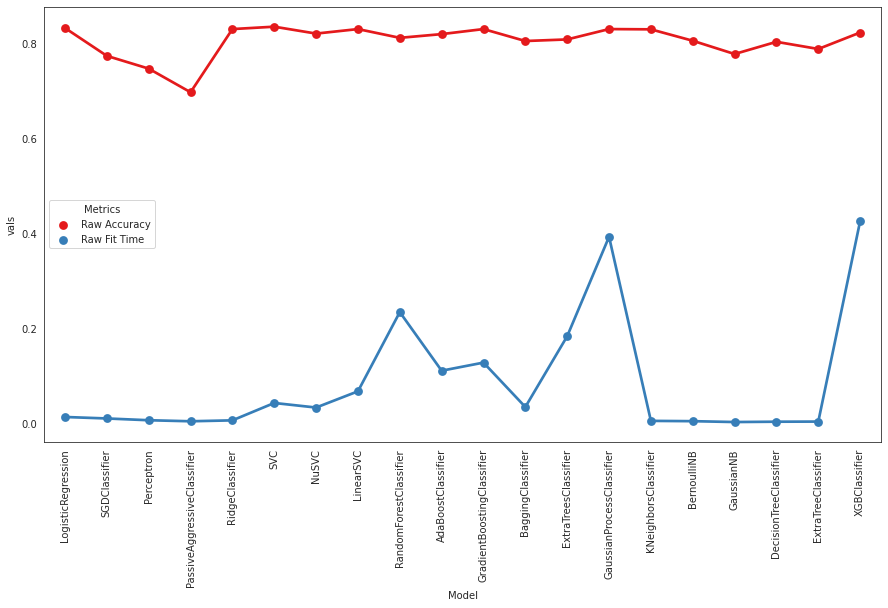

In [39]:
plt.figure(figsize=(15, 8))
sns.pointplot(x='Model', y='vals', hue='Metrics', data=models_overview.melt('Model', var_name='Metrics', value_name='vals'))
plt.xticks(rotation=90)

# Hyperparameter Tuning

In [40]:
# We only tune hyperparameters associated with those models which their current accuracy is greater than 80%

def tune(X, y, estimator, param_dist, cv, n_iter=50, n_jobs=-1):
    return RandomizedSearchCV(estimator=estimator, param_distributions=param_dist, n_iter=n_iter, n_jobs=n_jobs, scoring='accuracy', refit=True,
                              cv=cv, random_state=0).fit(X, y)

In [41]:
tuned_models = pd.DataFrame(columns=['Model', 'Parameters', 'Accuracy'])

model_param_list = [(LogisticRegression(max_iter=5000), dict(penalty = ['l2', 'elasticnet'], C = list(loguniform.rvs(1e-3, 1e3, size=50)))),
                    (RandomForestClassifier(), dict(n_estimators = [50, 100, 150, 200, 250, 300], max_features = ['sqrt', 'log2', None],
                                                    max_depth = [10, 15, 20, 30, 35, 40, None])),
                    (AdaBoostClassifier(), dict(n_estimators = [50, 100, 150, 200, 250, 300], learning_rate = uniform.rvs(0, 0.1), algorithm = ['SAMME', 'SAMME.R'])),
                    (GradientBoostingClassifier(), dict(n_estimators = [50, 100, 150, 200, 250, 300], learning_rate = uniform(0, 0.1), 
                                                        loss = ['log_loss', 'exponential'], subsample = uniform(0, 1), criterion = ['friedman_mse', 'squared_error'],
                                                        max_depth = [3, 5, 8, 10, 12, 15], max_features = ['sqrt', 'log2', None])),
                    (GaussianProcessClassifier(), dict(max_iter_predict = [50, 100, 150, 200, 250, 300])),
                    (KNeighborsClassifier(), dict(n_neighbors = [5, 8, 10, 12, 15], weights = ['uniform', 'distance'], leaf_size = [20, 25, 30, 35, 40, 45, 50],
                                                  metric = ['euclidean', 'manhattan', 'minkowski'])),
                    (XGBClassifier(), dict(n_estimators = [100, 120, 150, 180, 200, 220, 250], max_depth = [2, 3, 5, 8])),
                    (SVC(), dict(C = list(loguniform.rvs(1e-3, 1e3, size=50)), kernel = ['poly', 'rbf', 'sigmoid'], degree = uniform(3, 3),
                                 gamma = ['scale', 'auto'], coef0 = uniform(0, 3))),
                    (NuSVC(), dict(nu = list(loguniform.rvs(1e-5, 1 - 1e-5, size=50)), kernel = ['poly', 'rbf', 'sigmoid'], degree = uniform(3, 3),
                                   gamma = ['scale', 'auto'], coef0 = uniform(0, 3)))]

In [42]:
# Running this cell is very computational intensive and time consuming
# for i, tup in enumerate(model_param_list):
#     clf = tune(X, y, tup[0], tup[1], cv_split)
#     tuned_models.loc[i, :] = [tup[0].__class__.__name__, str(clf.best_params_), clf.best_score_]
#     print(tup[0].__class__.__name__ + ' Done')

In [43]:
tuned_models.sort_values(by='Accuracy', ascending=False)

,Model,Parameters,Accuracy


**You know what?**

*Using https://scikit-optimize.github.io/stable/ package may seem more reasonable; and even more handy ...*

# Feature Selection using RFE

In [44]:
# Running this cell produces so many warnings

# row_index = 0
# for Model in Models:
#     if Model in [SVC, NuSVC, BaggingClassifier, GaussianProcessClassifier, KNeighborsClassifier, GaussianNB]:
#         row_index += 1
#         continue
#     try:
#         model = Model(random_state=0)
#     except TypeError:
#         model = Model()
#     rfe = RFECV(model, cv=cv_split, scoring='accuracy', n_jobs=-1)
#     rfe.fit(X, y)
#     rfe_cols = X.columns.values[rfe.support_]
#     cv_results = cross_validate(model, X[rfe_cols], y, scoring='accuracy', cv=cv_split, n_jobs=-1)
    
#     models_overview.loc[row_index, 'RFE Accuracy'] = cv_results['test_score'].mean()
#     models_overview.loc[row_index, 'RFE Redundant Columns'] = str(set(X.columns.values) - set(rfe_cols))
#     models_overview.loc[row_index, 'RFE Fit Time'] = cv_results['fit_time'].mean()
    
#     row_index += 1

In [45]:
# models_overview['MAX Accuracy'] = models_overview[['Raw Accuracy', 'RFE Accuracy']].max(axis=1)
# models_overview.sort_values(by='MAX Accuracy', ascending=False)

In [46]:
# plt.figure(figsize=(15, 8))
# sns.pointplot(x='Model', y='vals', hue='Metrics', data=models_overview.drop('RFE Redundant Columns', axis=1).melt('Model', var_name='Metrics', value_name='vals'))
# plt.xticks(rotation=90)

# Combining Current Models to Create a Super Model

<AxesSubplot:>

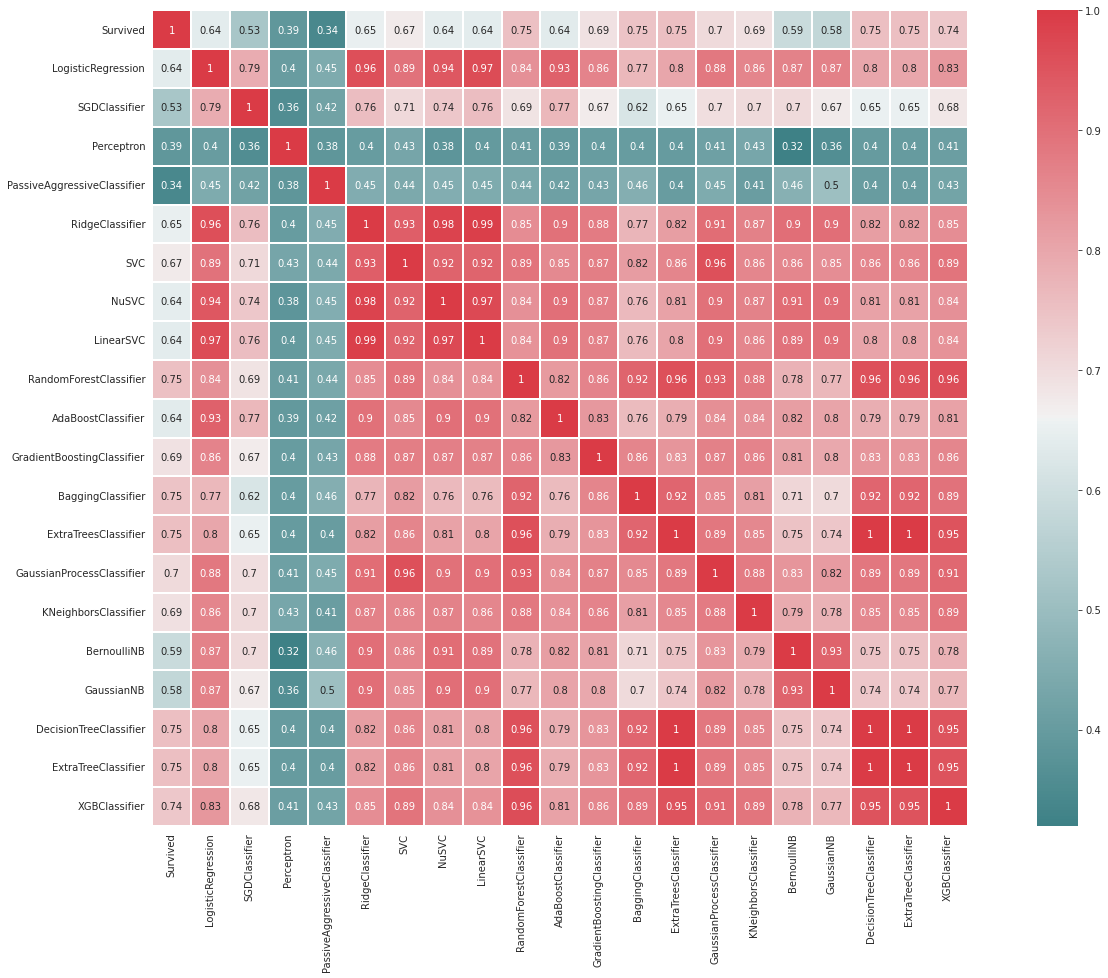

In [47]:
plt.figure(figsize=(25, 15))
sns.heatmap(predictions.corr(), cmap=sns.diverging_palette(200, 10, as_cmap=True), square=True, annot=True, linewidths=0.1, linecolor='white')

In [48]:
# We remove models without attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model

vote_estimators = [('ada', AdaBoostClassifier()), ('bag', BaggingClassifier()), ('bnb', BernoulliNB()), ('dtc', DecisionTreeClassifier()), ('gnb', GaussianNB()),
                   ('gpc', GaussianProcessClassifier()), ('gbc', GradientBoostingClassifier()), ('knn', KNeighborsClassifier()), ('lr', LogisticRegression()),
                   ('svc', SVC(probability=True)), ('nsvc', NuSVC(probability=True)), ('rfc', RandomForestClassifier()),
                   ('sgd', SGDClassifier(loss='modified_huber')), ('xgb', XGBClassifier())]

vote_hard = VotingClassifier(vote_estimators, voting='hard', n_jobs=-1)
vote_hard_cv = cross_validate(vote_hard, X, y, scoring='accuracy', cv=cv_split, n_jobs=-1, error_score='raise')
print('Hard Voting Test Accuracy Mean: {}'.format(vote_hard_cv['test_score'].mean()))

vote_soft = VotingClassifier(vote_estimators, voting='soft', n_jobs=-1)
vote_soft_cv = cross_validate(vote_soft, X, y, scoring='accuracy', cv=cv_split, n_jobs=-1, error_score='raise')
print('Soft Voting Test Accuracy Mean: {}'.format(vote_soft_cv['test_score'].mean()))

Hard Voting Test Accuracy Mean: 0.8357541899441341
Soft Voting Test Accuracy Mean: 0.8335195530726258


# Submission

In [49]:
vote_hard.fit(X, y)
y_pred = vote_hard.predict(X_test)

output = pd.DataFrame({
        "PassengerId": oh_test_df["PassengerId"],
        "Survived": y_pred
    })
output.to_csv('submission.csv', index=False)
print('Done!')

Done!
